<div class="alert alert-block alert-warning">

## U.S. States 117th Congress political leaning and how they rank as best states

- Code calculating the 117th Congress political lean can be found here: https://github.com/sharondill/Political-Leaning-States
  - This code creates a csv called 'States political lean 117th.csv' and it is used in this notebook.
- U.S. News 2021 rankings (https://www.usnews.com/news/best-states/rankings)
- Categories of: Health Care, Education, Economy, Infrastructure, Opportunity, Fiscal Stability, Crime and Correction, Natural Environment
- The categories were weighted in creating the over all ranking (see below)

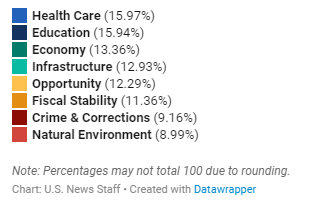
    

### Each category was rated with sub-categories   
- Health Care
  - Health Care Access, Health Care Quality, Public Health
- Education
  - Higher Education, Pre-K-12
- Economy
  - Business Environment, Employment, Growth
- Infrastrucure
  - Energy, Internet Access, Transportation
- Opportunity
  - Affordability, Economic opportunity, Equality
- Fiscal Stability
  - Long-term, Short-term
- Crime & Corrections
  - Corrections, Public Safety
- Natural Environment
  - Air & Water Quality, Pollution
    
</div>

In [1]:
# ---------------------------------------------------------------
# Written by Sharon Dill
# May 2022
# ---------------------------------------------------------------

<div class="alert alert-block alert-warning">

### <u>Goal of project:</u> 
- #### To determine if there are strengths/weaknesses of states based upon their political leaning.  Each party is thought of having specific focus and strengths.

- Democrats (https://democrats.org/where-we-stand/party-platform/) mention standing for the economy, healthcare, education, criminal justice, climate crisis and immigration.

- Republicans (https://gop.com/about-our-party/) mention standing for the economy, protecting freedoms and national security.

- In a 2017 Gallup pole (https://news.gallup.com/poll/212795/americans-say-parties-core-issue-strengths.aspx), those surveyed considered Democrats to be stronger on the environment, healthcare and education.  They considered both parties equal strength on the economy. For the Republicans, they listed national defense and federal government debt as their strengths.
    
</div>

### Rankings of US States by US News - shown is a sample of the state rankings
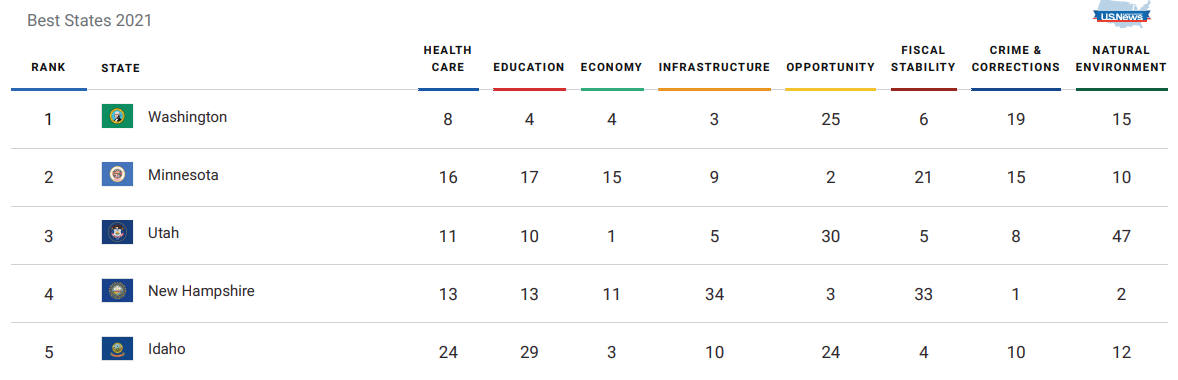

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data dictionary for 'States political lean 117th.csv'

| Field Name | Description | 
| :-- | :--- | 
| State | Name of state |
| houseRep | Score between 0 and 1 House that is Republican; .5 is 50% |
| State_abbr | two character state abbreviation |
| senateRep | Score between 0 and 1 of Senate that is Republican; .5 is 50% |
| state_fips | integer of the state FIPS (Federal Information Processing Standard) |
| presRep | Score between 0 and 1 of votes for Republican candidate; .5 is 50% |
| totalRep | houseRep + senateRep + presRep; score between .3 (VT) and 2.69 (WY) |
| Party | Red, Blue or Purple based on totalRep score |


#### NOTE:
Party value of Red, Blue or Purple are subjective and were determined as follows:
- **<span style="color:blue">Blue</span>** are those states with a totalRep value of .8
- **<span style="color:purple">Purple</span>** are those states with a totalRep value between .9 and 1.9
- **<span style="color:red">Red</span>** states are those states with a totalRep value greater than 1.9
- Vermont with the lowest score of .3 has two democratic senators, 1 democratic house of representatives (they only have 1 reprentative) and 30 percent of voters voted Republican.
- Wyoming as the most red state with a score of 2.69 has two republican senators and 1 (out of 1) republican house representative with 69% of voters voted Republican.
- The purple states are typically thought of as swing states and the ones that qualify based on the criteria described above are: Virginia, Colorado, Arizona, Maine, Minnesota, Michigan, Georgia, Pennsylvania, Wisconsin and Ohio.

In [3]:
# csv file created at: https://github.com/sharondill/Political-Leaning-States
df = pd.read_csv('States political lean 117th.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       50 non-null     object 
 1   houseRep    50 non-null     float64
 2   State_abbr  50 non-null     object 
 3   senateRep   50 non-null     float64
 4   state_fips  50 non-null     int64  
 5   presRep     50 non-null     float64
 6   totalRep    50 non-null     float64
 7   Party       50 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.2+ KB


,State,houseRep,State_abbr,senateRep,state_fips,presRep,totalRep,Party
0,ALABAMA,0.857143,AL,1.0,1,0.62,2.477143,Red
1,ALASKA,1.000000,AK,1.0,2,0.53,2.530000,Red
2,ARIZONA,0.444444,AZ,0.0,4,0.49,0.934444,Purple
3,ARKANSAS,1.000000,AR,1.0,5,0.62,2.620000,Red
4,CALIFORNIA,0.207547,CA,0.0,6,0.34,0.547547,Blue


In [4]:
# https://www.usnews.com/news/best-states/rankings

state = pd.read_csv('state rankings 2021.csv', sep = ' ')
# fix up state name
state['State'] = state['State'].replace({'NewHampshire':'New Hampshire',
                                       'NorthCarolina':'North Carolina',
                                       'NorthDakota':'North Dakota',
                                       'SouthDakota':'South Dakota',
                                       'SouthCarolina':'South Carolina',
                                       'NewJersey':'New Jersey',
                                       'RhodeIsland':'Rhode Island',
                                       'SouthCarolina':'South Carolina',
                                       'WestVirginia':'West Virginia',
                                       'NewYork':'New York',
                                       'NewMexico':'New Mexico'})

# move state to front of columns
cols = list(state)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('State')))
cols
state = state.loc[:, cols]

# put State in upper case
state['State'] = state['State'].str.upper()

state.head()

['State',
 'Rank',
 'HealthCare',
 'Education',
 'Economy',
 'Infrastructure',
 'Opportunity',
 'FiscalStability',
 'CrimeandCorrection',
 'NaturalEnviron']

,State,Rank,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron
0,WASHINGTON,1,8,4,4,3,25,6,19,15
1,MINNESOTA,2,16,17,15,9,2,21,15,10
2,UTAH,3,11,10,1,5,30,5,8,47
3,NEW HAMPSHIRE,4,13,13,11,34,3,33,1,2
4,IDAHO,5,24,29,3,10,24,4,10,12


In [5]:
# baseline of leaning states
df['Party'].value_counts()
df['Party'].value_counts(normalize = True)
# 48 percent Red (24)
# 32 percent Blue (16)
# 20 percent Purple (10)

Red       24
Blue      16
Purple    10
Name: Party, dtype: int64

Red       0.48
Blue      0.32
Purple    0.20
Name: Party, dtype: float64

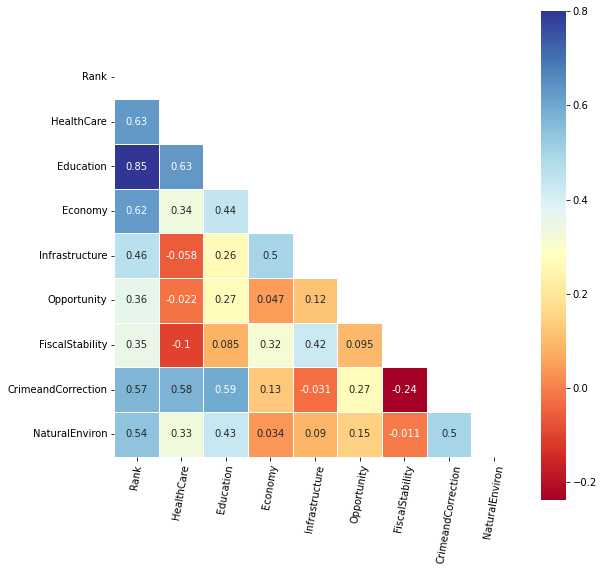

In [6]:
# ----------------------------- correlation matrix of state rankings -----------------------
columns = state.columns[1:10]
df_corr = state[columns]

corrmat = df_corr.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))

f, ax = plt.subplots(figsize=(9,9))

sns.heatmap(corrmat, vmax=.8, square=True, mask = mask, annot=True, cmap='RdYlBu', linewidths=.5 )
plt.xticks(rotation = 80);

### Rankings and correlations

The overall Rank was determined by the weights shown at the very beginning of this notebook with Health Care & Education having almost 16% weight each.  As can be seen in the correlation matrix, the highest correlation with the overall ranking is Education at .85.

Other observations:
- Education, Health Care and CrimeandCorrection are a trifecta with strong correlations to each other suggesting that states that excel on one of these topics tend to focus on all three of them.
- The strongest negative correlation at -.24 between CrimeandCorrection and FiscalStability suggests that a state does not excel at both of these at the same time. Could this also suggest that successful CrimeandCorrection is expensive?
- Healthcare has no correlation with Infrastructure, Opportunity or FiscalStability suggesting states with strong Healthcare are not putting effort into these other areas.
- There are moderate correlations with Infrastructure and Economy at .5 and Infrastructure and FiscalStability at .42.


In [7]:
# isolate certain columns
dfx = df[['State','State_abbr','totalRep','Party']]

In [8]:
# merge two dataframes
final = pd.merge(dfx, state)
final.head()
final.info()

,State,State_abbr,totalRep,Party,Rank,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron
0,ALABAMA,AL,2.477143,Red,46,45,47,38,28,37,22,43,37
1,ALASKA,AK,2.530000,Red,45,22,49,50,40,43,1,49,46
2,ARIZONA,AZ,0.934444,Purple,39,21,46,7,23,40,40,38,41
3,ARKANSAS,AR,2.620000,Red,44,49,41,41,43,22,14,48,30
4,CALIFORNIA,CA,0.547547,Blue,24,5,20,10,31,50,36,28,35


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               50 non-null     object 
 1   State_abbr          50 non-null     object 
 2   totalRep            50 non-null     float64
 3   Party               50 non-null     object 
 4   Rank                50 non-null     int64  
 5   HealthCare          50 non-null     int64  
 6   Education           50 non-null     int64  
 7   Economy             50 non-null     int64  
 8   Infrastructure      50 non-null     int64  
 9   Opportunity         50 non-null     int64  
 10  FiscalStability     50 non-null     int64  
 11  CrimeandCorrection  50 non-null     int64  
 12  NaturalEnviron      50 non-null     int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 5.5+ KB


### State ranking findings

- With lower rankings being better 
  - **<span style="color:Blue">Blue </span>**states rank better in HealthCare, CrimeandCorrection, Education and NaturalEnviron
    - Note that this is in alignment with the Gallup survey and have three correlated categories.
  - **<span style="color:purple">Purple </span>**states rank better at Opportunity and Economy
  - **<span style="color:red">Red </span>**states rank better at FiscalStability and Infrastructure

In [9]:
# look at ranking means by Party
x = final.groupby('Party').mean().transpose()

x.style.background_gradient(cmap = 'Blues').set_precision(2)

Party,Blue,Purple,Red
totalRep,0.52,1.14,2.41
Rank,21.56,23.10,29.12
HealthCare,12.62,23.40,34.96
Education,19.81,24.80,29.58
Economy,24.31,21.60,27.92
Infrastructure,28.62,26.60,22.96
Opportunity,29.69,16.40,26.50
FiscalStability,31.88,27.90,20.25
CrimeandCorrection,18.50,23.80,30.88
NaturalEnviron,22.56,26.30,27.12


In [10]:
# isolate ranking data for clustering
data = final.iloc[:,[5,6,7,8,9,10,11,12]] 
data.head()

,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron
0,45,47,38,28,37,22,43,37
1,22,49,50,40,43,1,49,46
2,21,46,7,23,40,40,38,41
3,49,41,41,43,22,14,48,30
4,5,20,10,31,50,36,28,35


### Unsupervised learning using clustering 

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling and standardization of variables
data_scaled = scaler.fit_transform(data)

# check out results 
pd.DataFrame(data_scaled).describe()
#pd.DataFrame(data_scaled).head()

,0,1,2,3,4,5,6,7
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.554312e-17,-1.110223e-18,0.000000,-4.440892e-18,4.440892e-18,2.220446e-18,8.881784e-18,-6.661338e-18
std,1.010153e+00,1.010153e+00,1.010153,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.697749e+00,-1.697749e+00,-1.697749,-1.697749e+00,-1.697749e+00,-1.697749e+00,-1.697749e+00,-1.697749e+00
25%,-8.488747e-01,-8.488747e-01,-0.848875,-8.488747e-01,-8.488747e-01,-8.488747e-01,-8.488747e-01,-8.488747e-01
50%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.488747e-01,8.488747e-01,0.848875,8.488747e-01,8.488747e-01,8.488747e-01,8.488747e-01,8.488747e-01
max,1.697749e+00,1.697749e+00,1.697749,1.697749e+00,1.697749e+00,1.697749e+00,1.697749e+00,1.697749e+00


### Elbow method is not conclusive on the best number of clusters

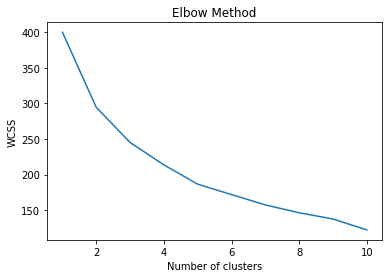

In [12]:
# use elbow method to determine best number of clusters
#from sklearn.cluster import KMeans
X = data_scaled
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss);
plt.title('Elbow Method');
plt.xlabel('Number of clusters');
plt.ylabel('WCSS'); #within cluster sum of squares
plt.show();

### Which cluster grouping to pick?

- Two clusters resulted in a group of states that excelled in 7 of the 8 categories. Essentially this grouping provided a group of states doing well in the categories and states doing poorly. There was no pattern in regard to political party and clustering.  There were more democratic leaning states in the group that excelled and the purple states were evenly split in the two clusters.
- Three clusters will be explored in more detail below.
- Four clusters results:
  - cluster 0 - strongest in HealthCare and CrimeandCorrections (9 Blue, 2 Purple states)
  - cluster 1 - not strong in any category, not worst in any category (8 Red, 5 Purple, 3 Blue)
  - cluster 2 - worse in all categories except Fiscal (8 Red, 1 Blue)
  - cluster 3 - strongest in Education, Economy, Infrastructure, Opportunity and NaturalEnvironment (8 Red, 3 Purpple, 3 Blue)

cluster centers:  [[ 0.82924085  1.09256524  0.75070551  0.72298715  0.14552138  0.39498659
   0.7137477   0.74146605]
 [-1.07941679 -0.6796328   0.07729157  0.67430234  0.07729157  0.6902937
  -1.09540815 -0.64231962]
 [ 0.07244571 -0.34332965 -0.55751696 -0.89139717 -0.14489141 -0.67720986
   0.16064048 -0.12599253]]
kmeans inertia:  244.06903572617864
size of clusters:  [[ 0  1  2]
 [15 13 22]]


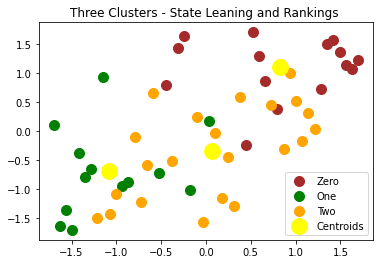

In [13]:
# three clusters
# random_state is similar to setting the seed to ensure consistency each run
kmeans = KMeans(n_clusters=3, random_state = 77)
kmeans.fit(X)
print("cluster centers: ", kmeans.cluster_centers_)
y_kmeans = kmeans.predict(X)
# see what output looks like
# cluster quality - lower (closer to zero) is better
print("kmeans inertia: ", kmeans.inertia_)
# look at size of each cluster
unique, counts = np.unique(y_kmeans, return_counts=True)
print("size of clusters: ", np.asarray((unique, counts)))

# plot results from 3 clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'brown', label='Zero');
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label='One');
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'orange', label='Two');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids');
plt.title('Three Clusters - State Leaning and Rankings ');
plt.legend();
plt.show();


In [14]:
# add y_kmeans back into data to see how states are clustered
tempWcluster3 = final.copy()
tempWcluster3['cluster'] = y_kmeans

tempWcluster3.head()

,State,State_abbr,totalRep,Party,Rank,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron,cluster
0,ALABAMA,AL,2.477143,Red,46,45,47,38,28,37,22,43,37,0
1,ALASKA,AK,2.530000,Red,45,22,49,50,40,43,1,49,46,0
2,ARIZONA,AZ,0.934444,Purple,39,21,46,7,23,40,40,38,41,0
3,ARKANSAS,AR,2.620000,Red,44,49,41,41,43,22,14,48,30,0
4,CALIFORNIA,CA,0.547547,Blue,24,5,20,10,31,50,36,28,35,1


In [15]:
# create subset per clusters for drill down
cluster2 = tempWcluster3[tempWcluster3['cluster'] == 2]
cluster1 = tempWcluster3[tempWcluster3['cluster'] == 1]
cluster0 = tempWcluster3[tempWcluster3['cluster'] == 0]

In [16]:
# look at means per cluster
tempWcluster3.groupby('cluster').mean()

,totalRep,Rank,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron
cluster,,,,,,,,,,
0,2.024434,42.666667,37.466667,41.266667,36.333333,35.933333,27.600000,31.200000,35.800000,36.200000
1,0.527456,19.076923,9.923077,15.692308,26.615385,35.230769,26.615385,35.461538,9.692308,16.230769
2,1.836347,17.590909,26.545455,20.545455,17.454545,12.636364,23.409091,15.727273,27.818182,23.681818


### 3 clusters results
- Cluster 0 has 10 Red, 4 Purple and 1 Blue state
  - Weakest rankings in all categories
- Cluster 1 has 11 Blue and 2 Purple states
  - Strongest rankings in HealthCare, Education, CrimeandCorrection and NaturalEnviron
- Cluster 2 has 14 Red, 4 Blue and 4 Purple states
  - Strongest rankings in Economy, Infrastructure, Opportunity and FiscalStability
  
#### What do 3 clusters suggest?
- Cluster 1 is the majority democratic group joined by Maine and Virginia (purple states).
  - This cluster contains the highest ranked states in the four correlated categories of HealthCare, Education, CrimeandCorrection and NaturalEnvironment and this matches the focus as stated by the democratic party.
- Cluster 2 has majority republican states.
  - This cluster has highest ranked states in two correlated categories of Infrastructure and FiscalStability along with two non correlated categories of Economy and Opportunity.

In [17]:
cluster0['Party'].value_counts()
cluster1['Party'].value_counts()
cluster2['Party'].value_counts()

Red       10
Purple     4
Blue       1
Name: Party, dtype: int64

Blue      11
Purple     2
Name: Party, dtype: int64

Red       14
Blue       4
Purple     4
Name: Party, dtype: int64

In [18]:
# who is in cluster 0? Weakest rankings in all categorie.
cluster0

,State,State_abbr,totalRep,Party,Rank,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron,cluster
0,ALABAMA,AL,2.477143,Red,46,45,47,38,28,37,22,43,37,0
1,ALASKA,AK,2.530000,Red,45,22,49,50,40,43,1,49,46,0
2,ARIZONA,AZ,0.934444,Purple,39,21,46,7,23,40,40,38,41,0
3,ARKANSAS,AR,2.620000,Red,44,49,41,41,43,22,14,48,30,0
13,INDIANA,IN,2.347778,Red,32,32,22,21,32,7,32,24,48,0
16,KENTUCKY,KY,2.453333,Red,41,44,36,40,18,20,48,13,29,0
17,LOUISIANA,LA,2.413333,Red,50,46,48,47,47,48,42,50,49,0
21,MICHIGAN,MI,0.980000,Purple,38,35,38,29,35,5,38,30,32,0
23,MISSISSIPPI,MS,2.330000,Red,49,50,43,49,48,44,41,33,22,0
30,NEW MEXICO,NM,0.763333,Blue,48,33,50,44,45,49,35,47,31,0


In [19]:
# 9 blue states and 2 purple
cluster1

,State,State_abbr,totalRep,Party,Rank,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron,cluster
4,CALIFORNIA,CA,0.547547,Blue,24,5,20,10,31,50,36,28,35,1
6,CONNECTICUT,CT,0.390000,Blue,20,3,6,22,46,45,30,6,28,1
10,HAWAII,HI,0.340000,Blue,25,1,27,46,33,34,46,12,1,1
12,ILLINOIS,IL,0.687778,Blue,30,23,11,39,26,12,50,16,43,1
18,MAINE,ME,0.940000,Purple,27,26,28,36,37,29,26,2,14,1
19,MARYLAND,MD,0.445000,Blue,17,6,14,35,38,15,29,22,11,1
20,MASSACHUSETTS,MA,0.320000,Blue,9,2,2,5,42,36,43,4,4,1
28,NEW HAMPSHIRE,NH,0.450000,Blue,4,13,13,11,34,3,33,1,2,1
29,NEW JERSEY,NJ,0.576667,Blue,19,4,1,33,41,19,49,5,33,1
31,NEW YORK,NY,0.666296,Blue,21,7,16,43,30,46,20,11,5,1


In [20]:
# majority red states
cluster2

,State,State_abbr,totalRep,Party,Rank,HealthCare,Education,Economy,Infrastructure,Opportunity,FiscalStability,CrimeandCorrection,NaturalEnviron,cluster
5,COLORADO,CO,0.848571,Purple,16,10,5,2,15,41,45,41,23,2
7,DELAWARE,DE,0.400000,Blue,23,14,24,24,25,14,12,39,45,2
8,FLORIDA,FL,2.102593,Red,10,25,3,8,20,33,8,26,18,2
9,GEORGIA,GA,1.061429,Purple,18,43,26,12,11,13,11,29,25,2
11,IDAHO,ID,2.640000,Red,5,24,29,3,10,24,4,10,12,2
14,IOWA,IA,2.280000,Red,12,20,18,27,19,1,23,14,20,2
15,KANSAS,KS,2.310000,Red,26,41,23,31,7,16,39,27,16,2
22,MINNESOTA,MN,0.950000,Purple,2,16,17,15,9,2,21,15,10,2
24,MISSOURI,MO,2.320000,Red,28,42,30,23,27,4,15,45,21,2
25,MONTANA,MT,2.070000,Red,33,36,32,19,13,35,19,34,24,2


### Conclusions

- There were four categories with respectable correlations: HealthCare, Education, CrimeandCorrection and NaturalEnvironment.
  - These categories are mentioned within the Democratic party as areas of focus in their mission.
  - Clustering put 9 blue states and 2 purple states together and it turns out this cluster was strongest in these categories.
- Other notable correlations were Infrastructure with Economy and Infrastructure with FiscalStablilty.
  - The republican party mentions economy as a topic in their focus.
  - Clustering put 14 red, 4 purple and 4 blue states together that were strongest in the categories of Economy, Infrastructure, Opportunity and FiscalStability.
- In looking at correlations between categories and clustering results, it can be seen that democratic and republican leaning states do have different strengths. And it turns out the strengths are in alignment with their stated party values.

#### Next steps
This was the first use of the state leaning 117th caucus data.  It was interesting to see that U.S. News rankings of eight categories did end up along party lines. The next step of analysis could be to gather financial data at the state level to see percents of budget that is spent on each category.